## This Notebook will be used to demonstrate the steps to build a KNN Model mentioned in this blog: [K-Nearest Neighbors (KNN) Algorithm in Machine Learning](https://www.enjoyalgorithms.com/blog/k-nearest-neighbours-in-ml/)

We will be using the IRIS dataset for demonstrating the classication capabilities of KNN algorithm in Machine Learning

In [1]:
import matplotlib.pyplot as plt   # update the plot 
from sklearn import datasets# read the data 
import numpy as np #for arrays
import pandas as pd 

Matplotlib created a temporary config/cache directory at /var/folders/w1/ddjn79r10gb30q27xq0t_fjw0000gn/T/matplotlib-is03crmd because the default path (/Users/ravishkumar/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
fc-list: major issue: So far, no MiKTeX administrator has checked for updates.
fc-list: major issue: So far, no MiKTeX administrator has checked for updates.


#### Data loading and visualizing the pair plot 

<Figure size 640x480 with 0 Axes>

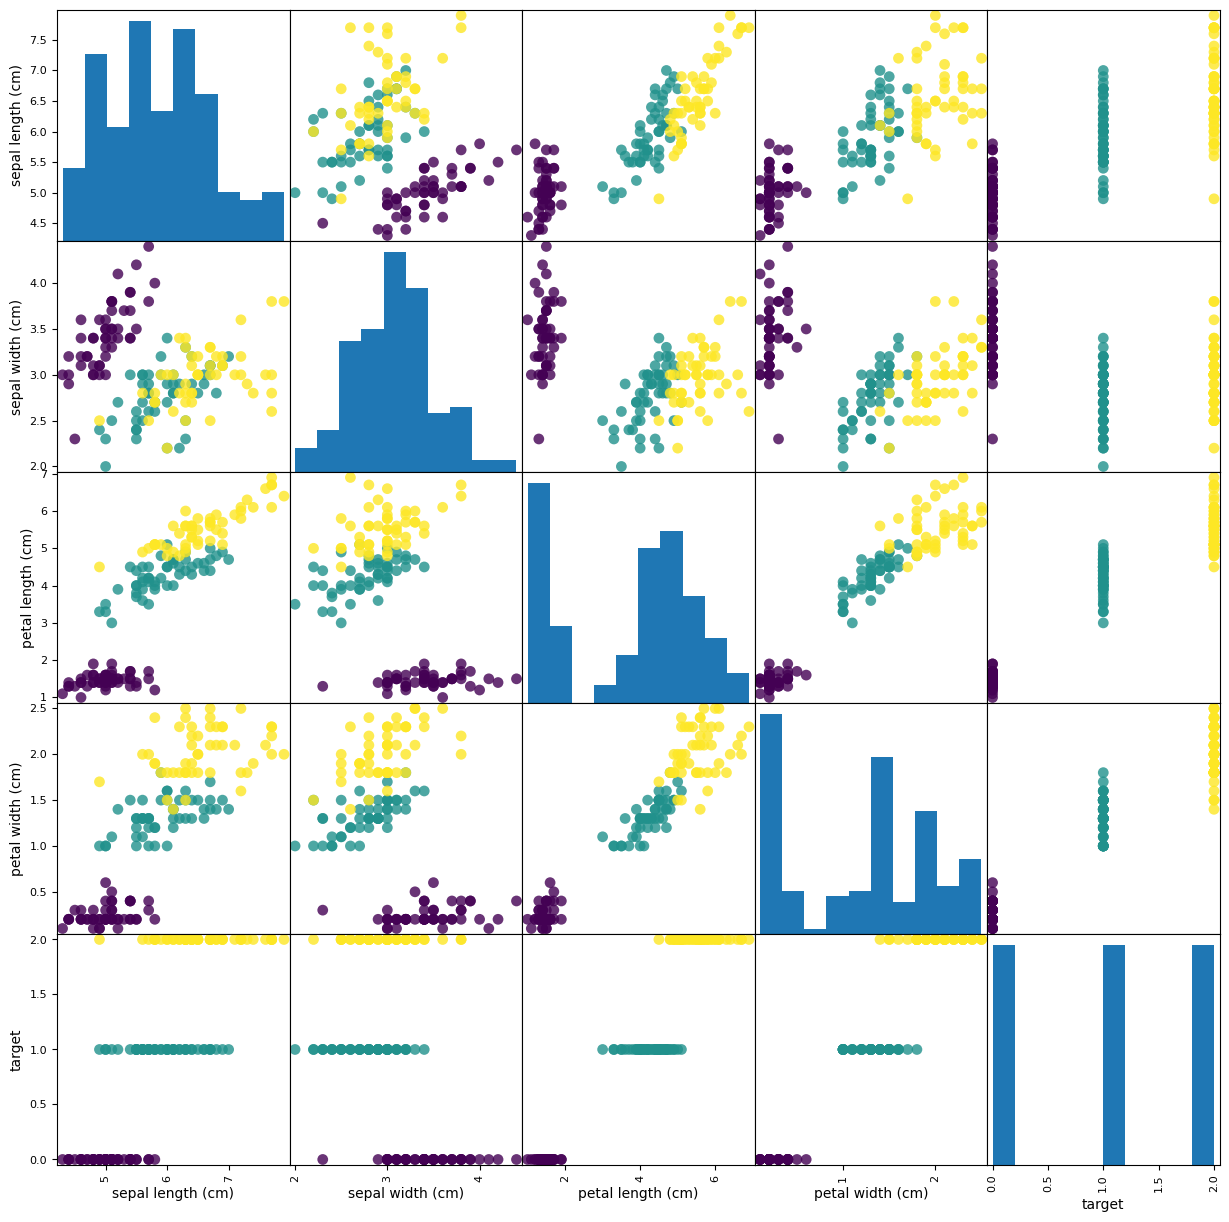

In [3]:
iris = datasets.load_iris() # read the data 

X = iris.data[:]  # select the features to use 
y = iris.target   # select the classes


iris_dataframe = pd.DataFrame (data= np.c_[iris['data'], iris['target']],

columns= iris['feature_names'] + ['target'])

plt.figure(2)
grr = pd.plotting.scatter_matrix(iris_dataframe,
                                 c=iris["target"],
                                 figsize=(15, 15),
                                 marker='o',
                                 s=60,
                                 alpha=.8)

plt.show(2)

#### SPlitting the dataset and normalizing the features using StandardScaler function

In [8]:
from sklearn.model_selection import train_test_split # split the data 
from sklearn.preprocessing import StandardScaler # scale the data 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=0)


SC = StandardScaler()# create the standard scaler 
SC.fit(X_train) # fit to the training data 

X_train_std = SC.transform(X_train) # transform the training data 
X_test_std = SC.transform(X_test) # same transformation on test data

### Training multiple KNN models with k varying from 1 to total number of samples

In [20]:
from sklearn.neighbors import KNeighborsClassifier # the algorithm 

from sklearn.metrics import accuracy_score  #grade the results 

In [22]:
accuracyTest = {}
accuracyTrain = {}

for k in range(len(y_test)):
    
    knn = KNeighborsClassifier(n_neighbors=k+1, p=2, metric='minkowski')
    knn.fit(X_train_std,y_train)
    y_pred = knn.predict(X_test_std)
    y_train_pred = knn.predict(X_train_std)

    if (k+1)%10==0:
       print(10*'-')
       print("For k = %s" %(k+1))
       print('Number in test ', len(y_test))
       print('Misclassified samples: %d' % (y_test != y_pred).sum())

    accTrain = accuracy_score(y_train,y_train_pred)
    acc = accuracy_score(y_test, y_pred)
    accuracyTest[k+1] = acc
    accuracyTrain[k+1] = accTrain


----------
For k = 10
Number in test  38
Misclassified samples: 1
----------
For k = 20
Number in test  38
Misclassified samples: 2
----------
For k = 30
Number in test  38
Misclassified samples: 4


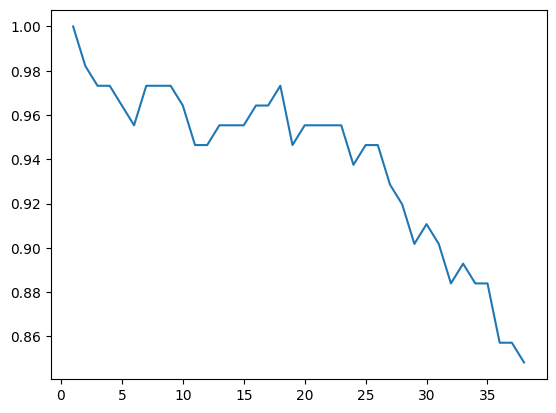

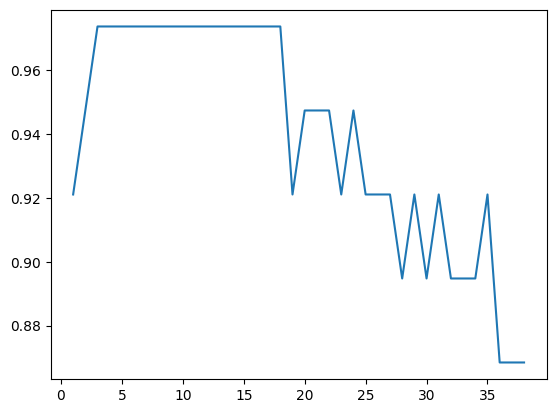

In [25]:
for accuracy in [accuracyTrain, accuracyTest]:
    
    lists = sorted(accuracy.items()) # sorted by key, return a list of tuples 
    X, y = zip(*lists) # unpack a list of pairs into two tuples 
    plt.plot(X, y)
    plt.show()

### Putting everything together

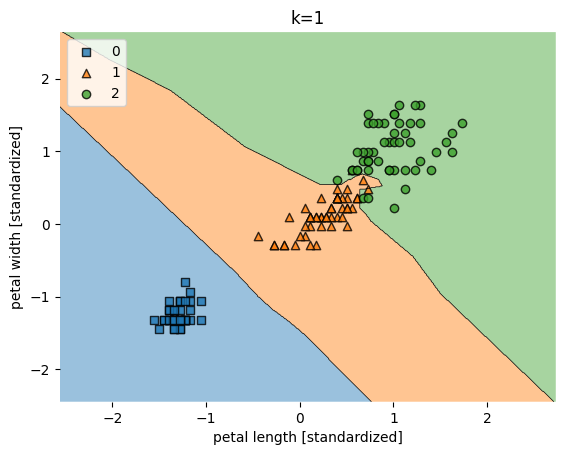

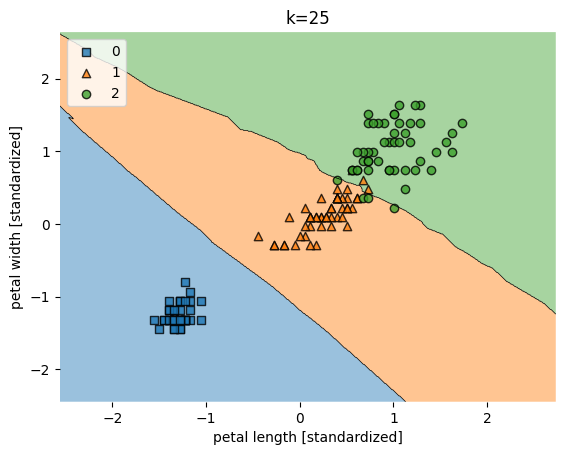

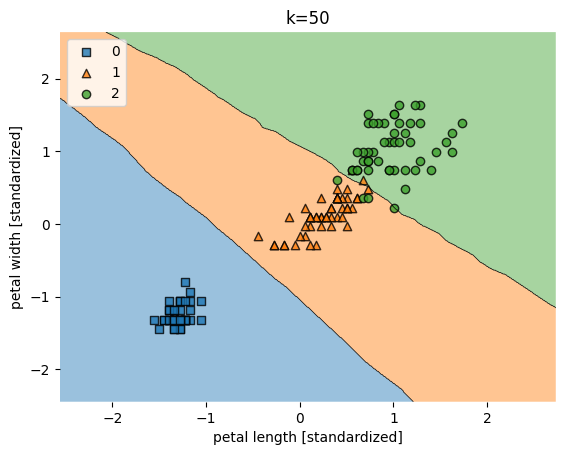

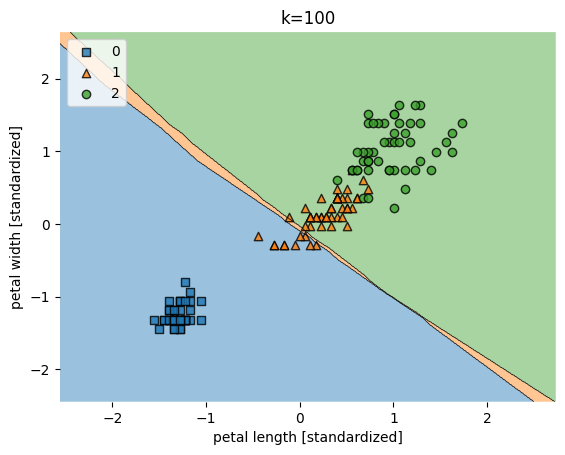

/Users/ravishkumar/EA_venv/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


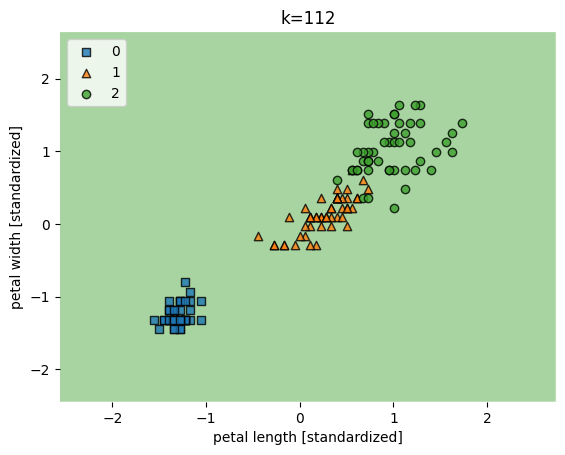

In [34]:
X = iris.data[:, [2,3]] # select the features to use 
y = iris.target # select the classes

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=0)


sc = StandardScaler()# create the standard scaler 
sc.fit(X_train) # fit to the training data 
X_train_std = sc.transform(X_train) # transform the training data 
X_test_std = sc.transform(X_test) # same transformation on test data

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# print('Number in combined ', len(y_combined))
# # check results on combined data 
# y_combined_pred = knn.predict(X_combined_std)

# print('Misclassified combined samples: %d'% (y_combined != y_combined_pred). sum )
# print('Combined Accuracy: %.2f' % accuracy_score(y_combined, y_combined_pred)) 
# # visualize the results

from mlxtend.plotting import plot_decision_regions

for k in [1,25,50, 100, len(X_train)]:
    
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    
    knn.fit(X_train_std, y_train)
    
    plot_decision_regions(X=X_combined_std, y=y_combined, clf=knn)

    plt.xlabel('petal length [standardized]') 
    plt.ylabel('petal width [standardized]') 
    plt.title('k=%s'%k) 
    plt.legend(loc='upper left') 
    plt.show()
